# Sentiment Analysis on Tourist Accomodation Reviews

Library

In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
%matplotlib inline
import numpy as np
seed_val = 0
np.random.seed(seed_val)

from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
nltk.download('word2vec_sample')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
news_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)
from sklearn import svm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itqon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\itqon\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itqon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\itqon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Dataset
Dataset tersedia secara publik yang di ambil dari Kaggle dengan format CSV dengan nama Trip Advisor Hotel Reviews, 2020. Dataset berasal dari situs akomodasi pariwisata yaitu TripAdvisor. Dataset terdiri dari 20.492 ulasan hotel yang diberikan oleh wisatawan pada situs TripAdvisor dengan 2 kolom/peubah yaitu Review dan Rating

In [3]:
#load dataset
df=pd.read_csv('tripadvisor_hotel_reviews.csv')

In [4]:
#lima observasi pertama dari dataset
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
#jumlah sampel dataset
len(df)

20491

In [6]:
#tipe data
df.dtypes

Review    object
Rating     int64
dtype: object

In [7]:
#cek missing value pada kolom Review
df["Review"].isna().sum()

0

In [8]:
#cek missing value pada kolom Rating
df["Rating"].isna().sum()

0

In [9]:
#cek unique value kolom rating
print(sorted(df['Rating'].unique()))

[1, 2, 3, 4, 5]


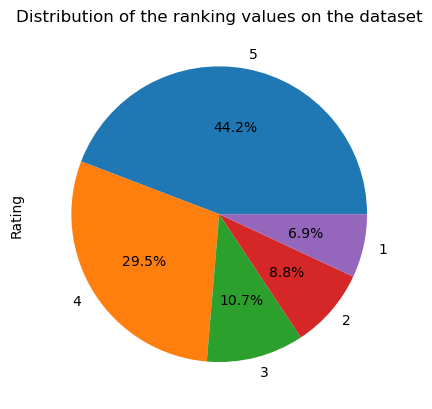

In [10]:
#Cek distribusi Rating
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of the ranking values on the dataset')
plt.show()

# Pre-processing
Pertama melakukan pelabelan pada kolom rating, dimana rating 1-2 sebagai sentimen negatif, rating 3 sebagai sentimen netral, dan rating 4-5 sebagai sentimen positif

In [11]:
#generate the new 'sentiment' column
classification=[]
for i in range(len(df)):
    if df['Rating'][i]>=4:
        rev='Pos'
    elif df['Rating'][i]==3:
        rev='Neu'
    else:
        rev='Neg'
    classification.append(rev)
df['sentiment']=classification

In [12]:
df.head()

,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,Pos
1,ok nothing special charge diamond member hilto...,2,Neg
2,nice rooms not 4* experience hotel monaco seat...,3,Neu
3,"unique, great stay, wonderful time hotel monac...",5,Pos
4,"great stay great stay, went seahawk game aweso...",5,Pos


Distribusi setelah dilakukan pelabelan kolom rating

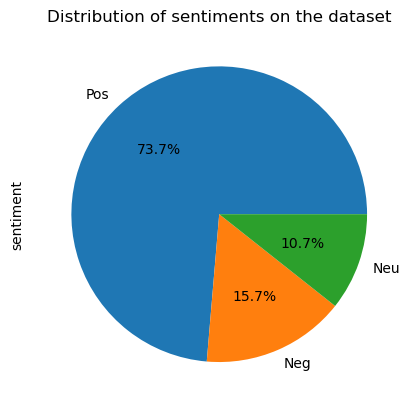

In [13]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of sentiments on the dataset')
plt.savefig('sentimentDistribution.png')
plt.show()

Berikut contoh kalimat ulasan dengan label positif dan negatif

In [14]:
print(df['Review'][0])
print(df['sentiment'][0])

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  
Pos


In [15]:
print(df['Review'][1])
print(df['sentiment'][1])

ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bus

### Tahapan pre-processing 
##### SVM
##### 1. Pembersihan kata 
##### 3. melakukan bag of words, stopword removal, dan ekstraksi 500 fitur kata yang paling sering muncul.

##### Lexicon Based
##### 1. Tidak dilakukan preprocessing

In [16]:
#define fungsi untuk cleaning data
def clean_rev_1(text):
    text.lower()
    #hapus semua yang bukan huruf
    text=re.sub('[^a-z]', " ", text)
    return text  

In [17]:
#apply fungsi ke kolom reviews
simple_cleaned_reviews=[clean_rev_1(df['Review'][i]) for i in range(len(df))]

In [18]:
#masukkan ke dataframe
df['simple_cleaned_reviews']=simple_cleaned_reviews

In [19]:
df.head()

,Review,Rating,sentiment,simple_cleaned_reviews
0,nice hotel expensive parking got good deal sta...,4,Pos,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Neg,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neu,nice rooms not experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,Pos,unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",5,Pos,great stay great stay went seahawk game aweso...


In [20]:
#shuffle data
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [21]:
#Create an array with the labels
labels=df_shuffled['sentiment'].values

In [22]:
#Define the sentiment labels in 'sentiment order' 
unique_labels=['Pos', 'Neu','Neg']

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk import wordnet
nltk.download('wordnet')
wnl=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\itqon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
df_shuffled.head()

,Review,Rating,sentiment,simple_cleaned_reviews
0,ehhh better punta cana twice compared hotel st...,2,Neg,ehhh better punta cana twice compared hotel st...
1,"4 n't think, decided book atenea night stay de...",2,Neg,n t think decided book atenea night stay de...
2,awesome time just returned vacation fantastic ...,4,Pos,awesome time just returned vacation fantastic ...
3,"grand oasis wonderful second time, group 20 fr...",5,Pos,grand oasis wonderful second time group fr...
4,not bad stay stayed hotel family attending jav...,3,Neu,not bad stay stayed hotel family attending jav...


In [29]:
#get the stop words
stops=set(stopwords.words('english'))

In [30]:
#define a function to lemmatise the reviews
def lemmatise_clean_review(review):
    word_list = nltk.word_tokenize(review)
    lemmatized_review = ' '.join([wnl.lemmatize(w) for w in word_list if w not in stops])
    return lemmatized_review

In [31]:
#lemmatise the reviews
cleaned_reviews= [lemmatise_clean_review(review) for review in simple_cleaned_reviews]

In [35]:
df_shuffled['cleaned_reviews']=cleaned_reviews

In [36]:
df_shuffled

,Review,Rating,sentiment,simple_cleaned_reviews,cleaned_reviews
0,ehhh better punta cana twice compared hotel st...,2,Neg,ehhh better punta cana twice compared hotel st...,nice hotel expensive parking got good deal sta...
1,"4 n't think, decided book atenea night stay de...",2,Neg,n t think decided book atenea night stay de...,ok nothing special charge diamond member hilto...
2,awesome time just returned vacation fantastic ...,4,Pos,awesome time just returned vacation fantastic ...,nice room experience hotel monaco seattle good...
3,"grand oasis wonderful second time, group 20 fr...",5,Pos,grand oasis wonderful second time group fr...,unique great stay wonderful time hotel monaco ...
4,not bad stay stayed hotel family attending jav...,3,Neu,not bad stay stayed hotel family attending jav...,great stay great stay went seahawk game awesom...
...,...,...,...,...,...
20486,"perfect, impressive place, want clean comfy ro...",5,Pos,perfect impressive place want clean comfy ro...,best kept secret rd time staying charm star ca...
20487,loved kuta lagoon just returned bali staying k...,4,Pos,loved kuta lagoon just returned bali staying k...,great location price view hotel great quick pl...
20488,nice modest hotel just returned italy included...,4,Pos,nice modest hotel just returned italy included...,ok look nice modern outside desk staff n parti...
20489,great place stay hi australian guy stayed june...,4,Pos,great place stay hi australian guy stayed june...,hotel theft ruined vacation hotel opened sept ...


In [38]:
#join all the corpus in a single string
all_reviews=' '.join(cleaned_reviews)

In [39]:
#Create a frequency distribution of the words in the corpus
all_words = nltk.FreqDist(w for w in all_reviews.split())

In [40]:
all_words

FreqDist({'hotel': 54050, 'room': 47779, 'great': 21485, 'n': 19112, 'good': 17491, 'staff': 16706, 'stay': 15601, 'night': 14577, 'day': 13484, 'time': 12981, ...})

In [41]:
#generate a list of the 500 most common words
N=500
word_features = list(all_words)[:N]

In [42]:
#show the 30 most common features
word_features[:30]

['hotel',
 'room',
 'great',
 'n',
 'good',
 'staff',
 'stay',
 'night',
 'day',
 'time',
 'nice',
 'location',
 'service',
 'beach',
 'stayed',
 'restaurant',
 'breakfast',
 'food',
 'clean',
 'place',
 'resort',
 'pool',
 'like',
 'really',
 'bed',
 'area',
 'bar',
 'friendly',
 'people',
 'small']

In [43]:
# build a function to extract the features from each review
def review_features(review): 
    words = nltk.word_tokenize(review) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in words)
    return features

In [44]:
#extract the features from each review and store this in a list
feature_reviews =[review_features(df_shuffled['simple_cleaned_reviews'][i]) for i in range(len(df))]

In [45]:
#generate a list of sets
features_labels_set=[(feature_reviews[i],df_shuffled['sentiment'][i]) for i in range(len(df))]

In [46]:
#splitting the data into training and test sets
train_data=features_labels_set[:int(len(df)*0.75)]
test_data=features_labels_set[int(len(df)*0.75):]

In [47]:
#generating only the x test set so we will be able to predict the values and evaluate the models on the same way as the previous models
x_test=feature_reviews[int(len(df)*0.75):]

#### SVM

In [48]:
feature_reviews_list_of_list=[list(review.values()) for review in feature_reviews ]

In [49]:
feature_reviews_array=np.array(feature_reviews_list_of_list)

In [50]:
x_train=feature_reviews_array[:int(len(df)*0.75)]
x_test=feature_reviews_array[int(len(df)*0.75):]
y_train=labels[:int(len(df)*0.75)]
y_test=labels[int(len(df)*0.75):]

In [51]:
clfsvc_500_features = svm.SVC(decision_function_shape='ovo')
clfsvc_500_features.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [52]:
y_pred=clfsvc_500_features.predict(x_test)

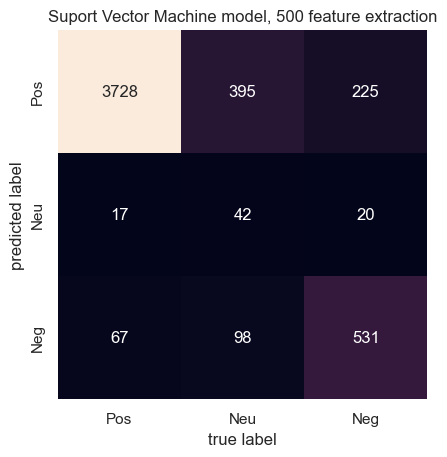

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
matrix8=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix8.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Suport Vector Machine model, 500 feature extraction')
plt.show()

In [56]:
accuracySVMFeatureExtraction=accuracy_score(y_test, y_pred)
accuracySVMFeatureExtraction

0.8395471403474527

In [57]:
f1_macroSVMFeatureExtraction=f1_score(y_test, y_pred, average='macro')
f1_macroSVMFeatureExtraction

0.5906668996966675

In [58]:
f1_SVMFeatureExtraction=f1_score(y_test, y_pred, average=None)
f1_SVMFeatureExtraction

array([0.72146739, 0.13680782, 0.91372549])

#### Lexicon Based
1. TextBlob 
2. NLTK 

Dataset tidak dilakukan preprocessing dan data split namun langsung dilakukan proses pencocokan kata dengan lexicon based

#### 1. TextBlob 

In [59]:
import textblob
from textblob import TextBlob

In [60]:
#define a function to predict the sentiment using the polarity value from the TextBlob model. 
#The reviews which polarity value are close to 0 will be classified as neutral
#The reviews with positive polarity higher than 0.1 will be classified as Positives
#And the reviews with negative polarity, lower than 0.1 will be classified as Negatives
def predict_sentiment(review):
    result=TextBlob(review).sentiment
    if result.polarity >0.1:
        sentiment='Pos'
    elif result.polarity<-0.1:
        sentiment='Neg'
    else:
        sentiment='Neu'
    return sentiment

In [61]:
#predict the sentiment for each of the reviews
text_blob_sentiments=[predict_sentiment(df_shuffled['Review'][i]) for i in range(len(df)) ]

In [62]:
#get the real sentiment
real_sentiments=list(df_shuffled['sentiment'])

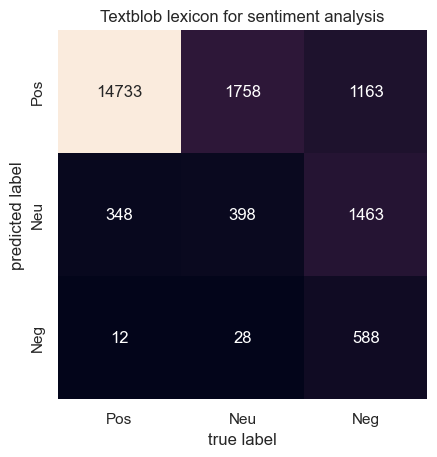

In [63]:
#visualise the results
matrix9=confusion_matrix(real_sentiments,text_blob_sentiments, labels=unique_labels)
sns.heatmap(matrix9.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Textblob lexicon for sentiment analysis')
plt.show()

In [64]:
#get the evaluation metrics
accuracyTextBlobLexicon=accuracy_score(real_sentiments, text_blob_sentiments)
accuracyTextBlobLexicon

0.7671172709970231

In [65]:
f1_macroTextBlobLexicon=f1_score(real_sentiments, text_blob_sentiments, average='macro')
f1_macroTextBlobLexicon

0.4623651844081122

In [66]:
f1_TextBlobLexicon=f1_score(real_sentiments, text_blob_sentiments, average=None)
f1_TextBlobLexicon

array([0.30609058, 0.18119736, 0.89980762])

#### 2. NLTK 

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\itqon\AppData\Roaming\nltk_data...


In [68]:
#define a function to predict the sentiment using the polarity value from the NLTK model built with Vader lexicon. 
#The reviews which polarity value are close to 0 will be classified as neutral
#The reviews with positive polarity higher than 0.1 will be classified as Positives
#And the reviews with negative polarity, lower than 0.1 will be classified as Negatives
def predict_vader_sentiment(review):
    result=sia.polarity_scores(review)['compound']
    if result >0.1:
        sentiment='Pos'
    elif result <-0.1:
        sentiment='Neg'
    else:
        sentiment='Neu'
    return sentiment

In [69]:
vader_sentiments=[predict_vader_sentiment(df_shuffled['Review'][i]) for i in range(len(df))]

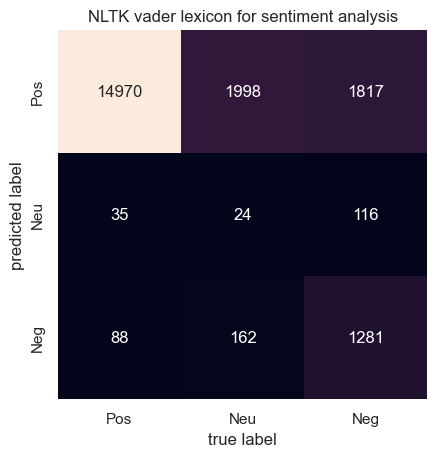

In [70]:
matrix10=confusion_matrix(real_sentiments,vader_sentiments, labels=unique_labels)
sns.heatmap(matrix10.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('NLTK vader lexicon for sentiment analysis')
plt.show()

In [71]:
accuracyNLTKVaderLexicon=accuracy_score(real_sentiments, vader_sentiments)
accuracyNLTKVaderLexicon

0.794251134644478

In [72]:
f1_macroNLTKVaderLexicon=f1_score(real_sentiments, vader_sentiments, average='macro')
f1_macroNLTKVaderLexicon

0.48134791744476607

In [73]:
f1_NLTKVaderLexicon=f1_score(real_sentiments, vader_sentiments, average=None)
f1_NLTKVaderLexicon

array([0.53993678, 0.0203476 , 0.88375937])

## Evaluasi

In [74]:
#join all the f1 arrays into a single array
f1_summary=np.concatenate((f1_SVMFeatureExtraction, f1_TextBlobLexicon, f1_NLTKVaderLexicon), axis=0)
#reshape it to the correct shape
f1_summary=f1_summary.reshape((3,3))
#create a dataframe
f1_df=pd.DataFrame(f1_summary, columns=["f1_'Neg'", "f1_'Neu","f1_'Pos"])

In [75]:
#create a dataframe to summarise the preprocessing techniques, the models and the evaluation metrics
summary=pd.DataFrame({'Pre-processing':['lemmatisation and feature extraction'," "," "],
                      'Model':['Support Vector Machine','TextBlob Lexicon', 'NLTK Vader Lexicon'],
                      'Accuracy':[accuracySVMFeatureExtraction, accuracyTextBlobLexicon,
                                  accuracyNLTKVaderLexicon],
                     'f1_macroaveraging':[f1_macroSVMFeatureExtraction, f1_macroTextBlobLexicon, f1_macroNLTKVaderLexicon]})
summary=pd.concat((summary,f1_df), axis=1)
summary

,Pre-processing,Model,Accuracy,f1_macroaveraging,f1_'Neg',f1_'Neu,f1_'Pos
0,lemmatisation and feature extraction,Support Vector Machine,0.839547,0.590667,0.721467,0.136808,0.913725
1,,TextBlob Lexicon,0.767117,0.462365,0.306091,0.181197,0.899808
2,,NLTK Vader Lexicon,0.794251,0.481348,0.539937,0.020348,0.883759


Selesai